<a href="https://colab.research.google.com/github/obaileyw-uncc/ecgr5105/blob/main/hw02_paramscaling_regularization/hw02_paramscaling_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECGR 5105 Homework 2: Standardization and Normalization
**Owen Bailey-Waltz (801488178)**

In [ ]:
# import required packages, load data
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import display

drive.mount('/content/drive/')
file_path = '/content/drive/MyDrive/datasets/Housing.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Problem 1: Un-normalized model

### Functions for multi-variable gradient descent
Gradient descent functions implemented in the previous homework modified to include validation loss

In [ ]:
def compute_loss(X, y, theta):
  H = X.dot(theta)
  sq_err = np.square(np.subtract(H, y))
  J = (1 / (2 * len(X))) * np.sum(sq_err)
  return J

def grad_desc(X, y, X_val, y_val, theta, alpha, N):
  m = len(y)
  train_loss_history = np.zeros(N)
  val_loss_history = np.zeros(N)

  for i in range(N):
    H = X.dot(theta)
    err = np.subtract(H, y)
    inc = (alpha / m) * X.transpose().dot(err)
    theta = np.subtract(theta, inc)
    train_loss_history[i] = compute_loss(X, y, theta)
    val_loss_history[i] = compute_loss(X_val, y_val, theta)

  return theta, train_loss_history, val_loss_history

Function for splitting the training and validations sets

In [ ]:
# split training and validations sets 80-20
def split_sets_80_20(X: np.ndarray, Y: np.ndarray):
  Y_val = []
  X_val = []

  if (len(Y) != len(X)):
    raise ValueError("Input and output vectors must be the same length")

  val_indices = rd.sample(range(len(X)), int(len(X)/5))
  for i in val_indices:
    Y_val = np.append(Y_val, Y[i])
    if len(X_val) == 0:
      X_val = X[i,:]
    else:
      X_val = np.vstack((X_val, X[i,:]))
  Y_train = np.delete(Y, val_indices)
  X_train = np.delete(X, val_indices, 0)

  return X_train, X_val, Y_train, Y_val

Function for plotting convergence with training and validation loss

In [ ]:
def plot_convergence(theta, train_loss_history, val_loss_history):
  print("Final value of parameters: {}".format(theta))
  print("Training loss history: {}".format(train_loss_history))
  print("Validation loss history: {}".format(val_loss_history))

  # plot the loss over time
  plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, color='blue')
  plt.plot(range(1, len(train_loss_history) + 1), val_loss_history, color='orange')
  plt.grid(True)
  plt.legend(['Training', 'Validation'])
  plt.xlabel('Number of iterations')
  plt.ylabel('Loss (J)')
  plt.title('Convergence of gradient descent (X)')
  plt.show()

### (a) Multi-variable gradient descent: area, bedrooms, bathrooms, stories, parking

In [ ]:
# load data and split validation & training sets
Y = df.values[:,0]
X = np.hstack((np.ones((len(Y), 1)), df.values[:,1:5],
               df.values[:,10].reshape(len(Y), 1)))

print(X)

rd.seed(0)
val_indices = rd.sample(range(len(X)), int(len(X)/5))
print(val_indices)

X, X_val, Y, Y_val = split_sets_80_20(X, Y)

# Y_val = []
# X_val = []
# for i in val_indices:
#   Y_val = np.append(Y_val, Y[i])
#   if len(X_val) == 0:
#     X_val = X[i,:]
#   else:
#     X_val = np.vstack((X_val, X[i,:]))
# Y = np.delete(Y, val_indices)
# X = np.delete(X, val_indices, 0)

[[1.0 7420 4 2 3 2]
 [1.0 8960 4 4 4 3]
 [1.0 9960 3 2 2 2]
 ...
 [1.0 3620 2 1 1 0]
 [1.0 2910 3 1 1 0]
 [1.0 3850 3 1 2 0]]
[394, 430, 41, 265, 523, 497, 414, 310, 488, 366, 223, 516, 142, 288, 143, 97, 256, 150, 317, 101, 75, 338, 483, 103, 362, 444, 323, 209, 536, 453, 266, 63, 14, 95, 368, 543, 204, 363, 422, 401, 342, 320, 0, 313, 252, 423, 519, 170, 124, 373, 166, 360, 445, 32, 529, 469, 290, 113, 122, 411, 72, 485, 278, 229, 46, 542, 163, 448, 260, 250, 55, 154, 282, 149, 361, 513, 280, 539, 417, 276, 104, 409, 308, 468, 300, 147, 227, 480, 305, 408, 197, 162, 294, 123, 148, 94, 96, 420, 511, 16, 501, 336, 133, 243, 35, 45, 347, 387, 66]


Final value of parameters: [0.47971659430127783 852.650016647014 1.7380897306694612 0.909625368916913
 1.3630234544694946 0.3349988798993221]
Training loss history: [6.96850029e+12 4.11400676e+12 2.77592264e+12 2.14867681e+12
 1.85464647e+12 1.71681558e+12 1.65220539e+12 1.62191843e+12
 1.60772097e+12 1.60106569e+12 1.59794592e+12 1.59648346e+12
 1.59579789e+12 1.59547650e+12 1.59532583e+12 1.59525518e+12
 1.59522204e+12 1.59520649e+12 1.59519918e+12 1.59519573e+12
 1.59519410e+12 1.59519331e+12 1.59519292e+12 1.59519272e+12
 1.59519261e+12 1.59519253e+12 1.59519248e+12 1.59519244e+12
 1.59519240e+12 1.59519236e+12 1.59519232e+12 1.59519228e+12
 1.59519225e+12 1.59519221e+12 1.59519217e+12 1.59519214e+12
 1.59519210e+12 1.59519206e+12 1.59519203e+12 1.59519199e+12
 1.59519196e+12 1.59519192e+12 1.59519188e+12 1.59519185e+12
 1.59519181e+12 1.59519177e+12 1.59519174e+12 1.59519170e+12
 1.59519166e+12 1.59519163e+12 1.59519159e+12 1.59519155e+12
 1.59519152e+12 1.59519148e+12 1.59519145e

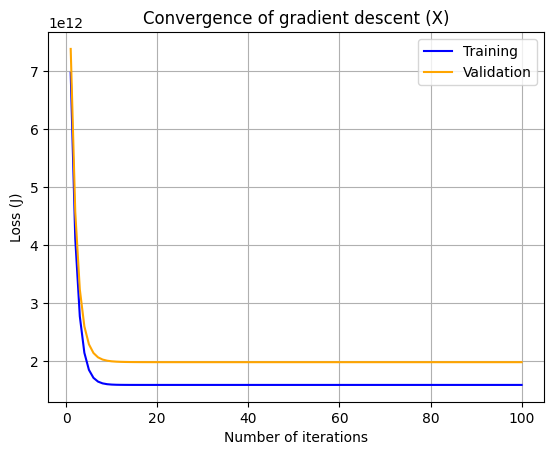

In [ ]:
alpha = 0.00000001
theta = np.zeros(6)
N = 100

# minimize loss and print new parameters
theta, train_loss_history, val_loss_history = grad_desc(X, Y, X_val, Y_val, theta, alpha, N)
plot_convergence(theta, train_loss_history, val_loss_history)

### (b) Multi-variable gradient descent, all variables but "furnished"

In [ ]:
Y = df.values[:,0]
X = np.hstack((np.ones((len(Y), 1)), df.values[:,1:12]))
X[X == 'yes'] = 1
X[X == 'no'] = 0

# separate training and validation sets
X, X_val, Y, Y_val = split_sets_80_20(X, Y)

Final value of parameters: [0.4987467260876159 857.3790879071266 1.7531858331849621
 0.9065765656663181 1.4520947717821546 0.4371001611611262
 0.17888608844977402 0.32816443076933954 0.05597709597523246
 0.3431614710882889 0.35552826112326513 0.1916291319797595]
Training loss history: [7.00815661e+12 4.12673366e+12 2.77369726e+12 2.13834884e+12
 1.84000681e+12 1.69991364e+12 1.63412974e+12 1.60323943e+12
 1.58873417e+12 1.58192288e+12 1.57872446e+12 1.57722255e+12
 1.57651728e+12 1.57618608e+12 1.57603053e+12 1.57595747e+12
 1.57592314e+12 1.57590700e+12 1.57589939e+12 1.57589580e+12
 1.57589409e+12 1.57589327e+12 1.57589286e+12 1.57589264e+12
 1.57589252e+12 1.57589244e+12 1.57589238e+12 1.57589233e+12
 1.57589228e+12 1.57589224e+12 1.57589220e+12 1.57589216e+12
 1.57589211e+12 1.57589207e+12 1.57589203e+12 1.57589199e+12
 1.57589195e+12 1.57589190e+12 1.57589186e+12 1.57589182e+12
 1.57589178e+12 1.57589174e+12 1.57589169e+12 1.57589165e+12
 1.57589161e+12 1.57589157e+12 1.57589153e+

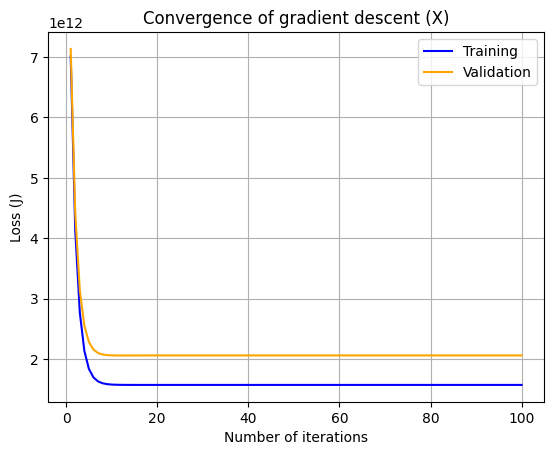

In [ ]:
alpha = 0.00000001
theta = np.zeros(12)
N = 100

# minimize loss and print new parameters
theta, train_loss_history, val_loss_history = grad_desc(X, Y, X_val, Y_val, theta, alpha, N)
print("Final value of parameters: {}".format(theta))
print("Training loss history: {}".format(train_loss_history))
print("Validation loss history: {}".format(val_loss_history))

# plot the loss over time
plt.plot(range(1, N + 1), train_loss_history, color='blue')
plt.plot(range(1, N + 1), val_loss_history, color='orange')
plt.grid(True)
plt.legend(['Training', 'Validation'])
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent (X)')
plt.show()

# three training set points picked randomly, then predict some values
# foo = np.array([1, 7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1]).transpose().dot(theta)
# boo = np.array([1, 7500, 4, 2, 2, 1, 0, 1, 0, 1, 3, 1]).transpose().dot(theta)
# soo = np.array([1, 3745, 3, 1, 2, 1, 0, 1, 0, 0, 0, 0]).transpose().dot(theta)
# print("Predictions for training set inputs (7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1)"
#       + " (7500, 4, 2, 2, 1, 0, 1, 0, 1, 3, 1) & "
#       + "(3745, 3, 1, 2, 1, 0, 1, 0, 0, 0, 0)")
# print("{} {} {}".format(foo, boo, soo))
# print("Training set 13300000 12215000 4655000")
# print()

## Problem 2: Input-scaled models

### Functions for min-max normalization and standardization

In [ ]:
# function to min-max normalize an input dataset
def input_min_max_norm(X: np.ndarray) -> np.ndarray:
  (_, col) = X.shape
  for i in range(1, col):
    max = X[:,i].max()
    min = X[:,i].min()
    X[:,i] = np.divide(np.subtract(X[:,i], min), (max - min))
  return X

In [ ]:
# function to standardize an input dataset
def input_standardize(X: np.ndarray) -> np.ndarray:
  (_, col) = X.shape
  for i in range(1, col):
    mu = np.sum(X[:,i]) / len(X[:,i])
    sigma = np.sqrt(np.divide(np.sum(np.square(np.subtract(X[:,i], mu))), len(X[:,i])))
    X[:,i] = np.divide(np.subtract(X[:,i], mu), sigma)
  return X

### (a) Problem 1(a) with normalization and standardization

#### Min-Max Normalization

In [ ]:
# load data and split validation & training sets
Y = df.values[:,0]
X = np.hstack((np.ones((len(Y), 1)), df.values[:,1:5],
               df.values[:,10].reshape(len(Y), 1)))

X = input_min_max_norm(X)
X, X_val, Y, Y_val = split_sets_80_20(X, Y)

Final value of parameters: [2198447.823421796 3780248.704165548 1283685.838861475 3185854.939917855
 1738521.4585530926 1490608.8994448623]
Training loss history: [1.12672076e+13 9.94040267e+12 8.78806792e+12 ... 7.72068516e+11
 7.72048908e+11 7.72029340e+11]
Validation loss history: [1.27002331e+13 1.12565688e+13 9.99650661e+12 ... 8.12799667e+11
 8.12776503e+11 8.12753370e+11]


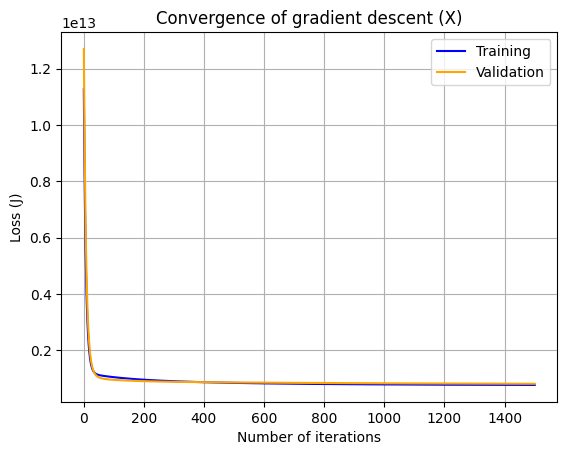

In [ ]:
alpha = 0.05
theta = np.zeros(6)
N = 1500

# minimize loss and plot convergence
theta, train_loss_history, val_loss_history = grad_desc(X, Y, X_val, Y_val, theta, alpha, N)
plot_convergence(theta, train_loss_history, val_loss_history)

#### Standardization

In [ ]:
# load data and split validation & training sets
Y = df.values[:,0]
X = np.hstack((np.ones((len(Y), 1)), df.values[:,1:5],
               df.values[:,10].reshape(len(Y), 1)))

X = input_standardize(X)
X, X_val, Y, Y_val = split_sets_80_20(X, Y)

Final value of parameters: [4747683.9080699915 749416.2316444892 71897.63126017521 628129.3907958944
 467497.2550182361 293627.0850002372]
Training loss history: [1.18394501e+13 1.06835275e+13 9.65499381e+12 ... 7.69182267e+11
 7.69182267e+11 7.69182267e+11]
Validation loss history: [1.17419743e+13 1.06418495e+13 9.65785836e+12 ... 7.64814279e+11
 7.64814279e+11 7.64814279e+11]


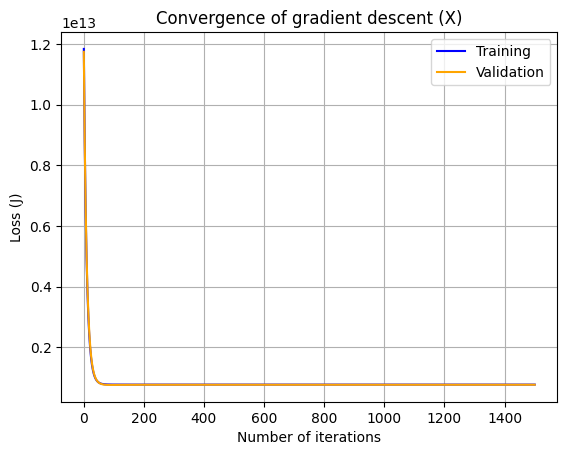

In [ ]:
alpha = 0.05
theta = np.zeros(6)
N = 1500

# minimize loss and plot convergence
theta, train_loss_history, val_loss_history = grad_desc(X, Y, X_val, Y_val, theta, alpha, N)
plot_convergence(theta, train_loss_history, val_loss_history)

### (b) Problem 1(b) with normalization and standardization

#### Min-Max Normalization

In [ ]:
# load data and split validation & training sets
Y = df.values[:,0]
X = np.hstack((np.ones((len(Y), 1)), df.values[:,1:12]))
X[X == 'yes'] = 1
X[X == 'no'] = 0

X = input_min_max_norm(X)
X, X_val, Y, Y_val = split_sets_80_20(X, Y)

Final value of parameters: [1777166.2399683732 2815334.77283242 1016314.754910574 2749871.427995033
 1245823.9024023388 509102.6019948187 363726.45462426555
 386191.86507507967 861773.2408460787 894165.9748402206 883299.1453720074
 693202.1062911252]
Training loss history: [1.02513282e+13 8.06215287e+12 6.38903217e+12 ... 5.84472884e+11
 5.84456525e+11 5.84440197e+11]
Validation loss history: [1.02177592e+13 8.03820146e+12 6.37285691e+12 ... 5.58329402e+11
 5.58329155e+11 5.58328925e+11]


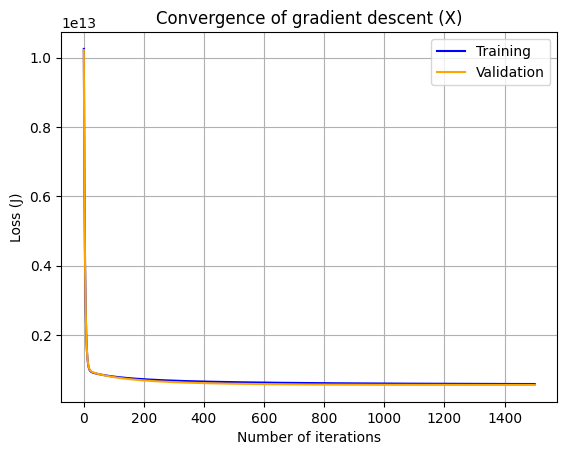

In [ ]:
alpha = 0.05
theta = np.zeros(12)
N = 1500

# minimize loss and print new parameters
theta, train_loss_history, val_loss_history = grad_desc(X, Y, X_val, Y_val, theta, alpha, N)
plot_convergence(theta, train_loss_history, val_loss_history)

#### Standardization

In [ ]:
# load data and split validation & training sets
Y = df.values[:,0]
X = np.hstack((np.ones((len(Y), 1)), df.values[:,1:12]))
X[X == 'yes'] = 1
X[X == 'no'] = 0

X = input_standardize(X)
X, X_val, Y, Y_val = split_sets_80_20(X, Y)

Final value of parameters: [4749014.435700782 534348.3219586518 97969.91382533881 431242.8914920013
 428636.72816352884 130230.09196788401 162189.11775223867
 177744.76815341742 206255.53902702112 419006.23285772355
 266852.5380039117 282601.93261263723]
Training loss history: [1.14937668e+13 1.03395711e+13 9.31715710e+12 ... 5.45921604e+11
 5.45921604e+11 5.45921604e+11]
Validation loss history: [1.29362224e+13 1.16975434e+13 1.05982704e+13 ... 6.87057761e+11
 6.87057761e+11 6.87057761e+11]


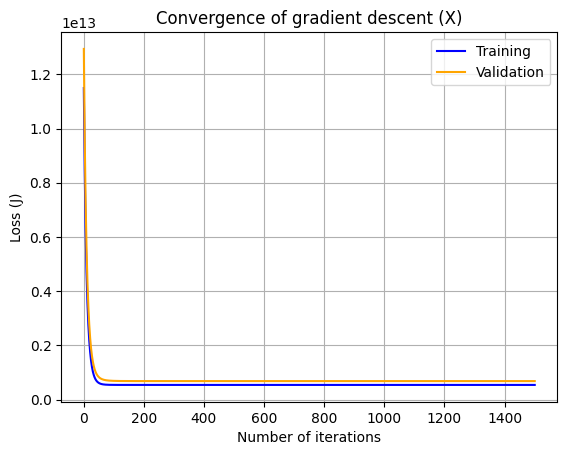

In [ ]:
alpha = 0.05
theta = np.zeros(12)
N = 1500

# minimize loss and print new parameters
theta, train_loss_history, val_loss_history = grad_desc(X, Y, X_val, Y_val, theta, alpha, N)
plot_convergence(theta, train_loss_history, val_loss_history)

## Problem 3: Input-scaled models with parameter penalties applied

### Functions for gradient descent with a parameter penalty term

In [ ]:
def compute_loss_regularized(X, y, theta, lamb):
  H = X.dot(theta)
  sq_err = np.square(np.subtract(H, y))
  penalty = lamb * np.sum(np.square(theta[1:]))
  J = (1 / (2 * len(X))) * (np.sum(sq_err) + penalty)
  return J

def grad_desc_regularized(X, y, X_val, y_val, theta, alpha, lamb, N):
  m = len(y)
  train_loss_history = np.zeros(N)
  val_loss_history = np.zeros(N)

  for i in range(N):
    H = X.dot(theta)
    err = np.subtract(H, y)
    reg = theta * (1 - alpha * (lamb/m))
    inc = (alpha / m) * X.transpose().dot(err)
    theta = np.subtract(reg, inc)
    train_loss_history[i] = compute_loss_regularized(X, y, theta, lamb)
    val_loss_history[i] = compute_loss(X_val, y_val, theta)

  return theta, train_loss_history, val_loss_history

### (a) Problem 2(a) with parameter penalties

#### Min-Max Normalization

In [ ]:
# load data and split validation & training sets
Y = df.values[:,0]
X = np.hstack((np.ones((len(Y), 1)), df.values[:,1:5],
               df.values[:,10].reshape(len(Y), 1)))

X = input_min_max_norm(X)
X, X_val, Y, Y_val = split_sets_80_20(X, Y)

Final value of parameters: [2311551.3142645676 4033087.214753836 1250735.69617656 2934647.9213833427
 1672624.0500107326 1228454.162453436]
Training loss history: [1.15469408e+13 1.01786476e+13 8.98990559e+12 ... 7.45159610e+11
 7.45140508e+11 7.45121446e+11]
Validation loss history: [1.14668206e+13 1.00966159e+13 8.90844483e+12 ... 9.67029399e+11
 9.67032500e+11 9.67035616e+11]


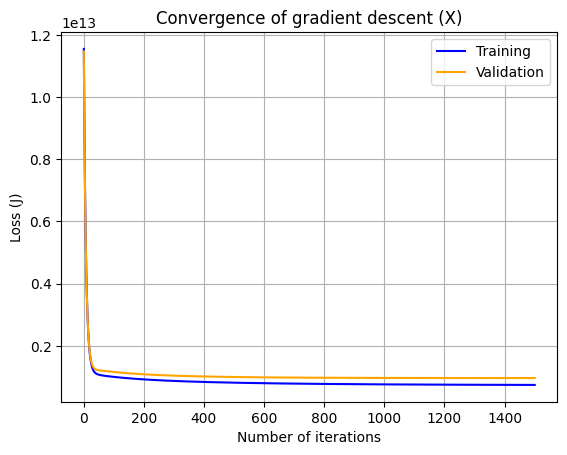

In [ ]:
alpha = 0.05
theta = np.zeros(6)
lamb = 0.5
N = 1500

# minimize loss and plot convergence
theta, train_loss_history, val_loss_history = grad_desc_regularized(X, Y, X_val, Y_val, theta, alpha, lamb, N)
plot_convergence(theta, train_loss_history, val_loss_history)

#### Standardization

In [ ]:
# load data and split validation & training sets
Y = df.values[:,0]
X = np.hstack((np.ones((len(Y), 1)), df.values[:,1:5],
               df.values[:,10].reshape(len(Y), 1)))

X = input_standardize(X)
X, X_val, Y, Y_val = split_sets_80_20(X, Y)

Final value of parameters: [4728120.1797621995 721159.9998613753 130806.70136874066 553500.0843647263
 464587.3081631407 272734.1413334216]
Training loss history: [1.14579552e+13 1.03810785e+13 9.41484632e+12 ... 7.16344490e+11
 7.16344490e+11 7.16344490e+11]
Validation loss history: [1.35208588e+13 1.22857215e+13 1.11781906e+13 ... 9.76490610e+11
 9.76490610e+11 9.76490610e+11]


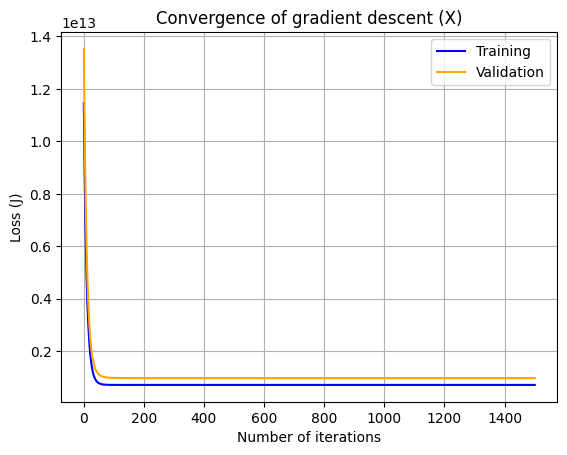

In [ ]:
alpha = 0.05
theta = np.zeros(6)
lamb = 0.5
N = 1500

# minimize loss and plot convergence
theta, train_loss_history, val_loss_history = grad_desc_regularized(X, Y, X_val, Y_val, theta, alpha, lamb, N)
plot_convergence(theta, train_loss_history, val_loss_history)

### (b) Problem 2(b) with parameter penalties

#### Min-Max Normalization

In [ ]:
# load data and split validation & training sets
Y = df.values[:,0]
X = np.hstack((np.ones((len(Y), 1)), df.values[:,1:12]))
X[X == 'yes'] = 1
X[X == 'no'] = 0

X = input_min_max_norm(X)
X, X_val, Y, Y_val = split_sets_80_20(X, Y)

Final value of parameters: [1686840.7755486064 2612544.109091048 1244946.7291707268 2368014.387884834
 1341966.0678412265 519554.10709531227 303412.3252602873 375954.0591142614
 920961.1448340417 960961.4697511334 1076981.9857746186 710117.546547692]
Training loss history: [1.02735389e+13 8.08863907e+12 6.41688586e+12 ... 5.99966501e+11
 5.99958267e+11 5.99950052e+11]
Validation loss history: [1.01525411e+13 7.96608915e+12 6.29745914e+12 ... 6.22717129e+11
 6.22692851e+11 6.22668603e+11]


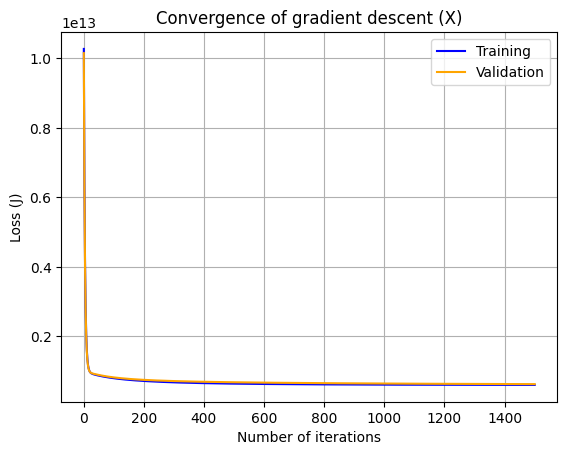

In [ ]:
alpha = 0.05
theta = np.zeros(12)
lamb = 1
N = 1500

# minimize loss and print new parameters
theta, train_loss_history, val_loss_history = grad_desc_regularized(X, Y, X_val, Y_val, theta, alpha, lamb, N)
plot_convergence(theta, train_loss_history, val_loss_history)

#### Standardization

In [ ]:
# load data and split validation & training sets
Y = df.values[:,0]
X = np.hstack((np.ones((len(Y), 1)), df.values[:,1:12]))
X[X == 'yes'] = 1
X[X == 'no'] = 0

X = input_standardize(X)
X, X_val, Y, Y_val = split_sets_80_20(X, Y)

Final value of parameters: [4777430.05450284 598878.0780947887 95586.71611454977 473122.4174395563
 355993.7325929175 164977.9962956075 114089.36264650735 152363.0618177895
 159392.45208092523 406160.9730825866 251785.77564568166 253772.9900620432]
Training loss history: [1.17112667e+13 1.05425056e+13 9.50703279e+12 ... 5.73580043e+11
 5.73580043e+11 5.73580043e+11]
Validation loss history: [1.19889673e+13 1.07467508e+13 9.64946570e+12 ... 5.84301601e+11
 5.84301601e+11 5.84301601e+11]


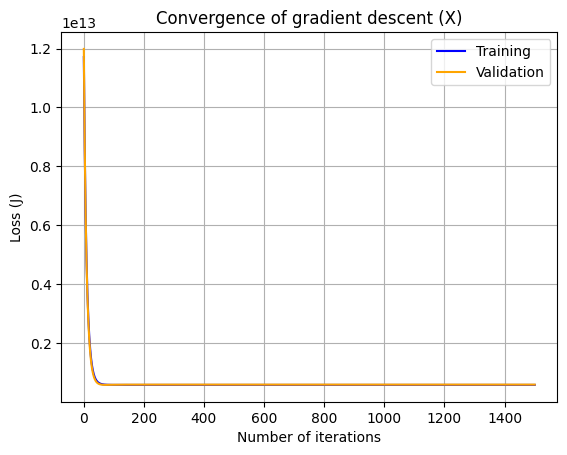

In [ ]:
alpha = 0.05
theta = np.zeros(12)
lamb = 1
N = 1500

# minimize loss and print new parameters
theta, train_loss_history, val_loss_history = grad_desc_regularized(X, Y, X_val, Y_val, theta, alpha, lamb, N)
plot_convergence(theta, train_loss_history, val_loss_history)